In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files_path = 'D:\\Stations_data\\Bansathi\\Bansathi_all_months_copy'
os.chdir(files_path)

In [4]:
df = pd.read_csv('Bansathi_all.csv', sep=',')
df

date  S1counts   S1SM  S1Perm  S1Temp  S1Volt  S2counts  \
0      29.02.2020 07:06:14   13004.0   8.33   15.46  19.602    7.26   11770.0   
1      29.02.2020 07:16:14   13004.0   8.33   15.46  19.594    7.26   11771.0   
2      29.02.2020 07:26:14   13003.0   8.34   15.47  19.563    7.26   11771.0   
3      29.02.2020 07:36:14   13002.0   8.34   15.48  19.492    7.26   11771.0   
4      29.02.2020 07:46:14   13003.0   8.34   15.47  19.492    7.26   11771.0   
...                    ...       ...    ...     ...     ...     ...       ...   
29631  28.01.2021 13:10:48   12083.0  12.15   22.84  14.453   11.57   11333.0   
29632  28.01.2021 13:20:48   12082.0  12.16   22.85  14.523   11.57   11333.0   
29633  28.01.2021 13:30:48   12082.0  12.16   22.85  14.570   11.54   11333.0   
29634  28.01.2021 13:40:48   12081.0  12.16   22.85  14.633   11.54   11333.0   
29635  28.01.2021 13:50:48   12080.0  12.17   22.86  14.727   11.57   11333.0   

        S2SM  S2Perm  S2Temp  ...  S9counts   S9SM  S9Perm  S9Temp  S9Volt  \
0      13.67   25.44  20.664  ...   14518.0   4.51    6.80  18.164    7.28   
1      13.67   25.43  20.703  ...   14521.0   4.51    6.79  18.094    7.28   
2      13.67   25.43  20.656  ...   14520.0   4.51    6.79  18.086    7.28   
3      13.67   25.43  20.648  ...   14519.0   4.51    6.80  18.117    7.28   
4      13.67   25.43  20.648  ...   14518.0   4.51    6.80  18.117    7.28   
...      ...     ...     ...  ...       ...    ...     ...     ...     ...   
29631  16.68   30.10  14.828  ...   12211.0  11.66   21.96  13.688   11.67   
29632  16.68   30.10  14.859  ...   12210.0  11.67   21.96  13.750   11.70   
29633  16.68   30.10  14.867  ...   12210.0  11.67   21.96  13.773   11.70   
29634  16.68   30.10  14.875  ...   12210.0  11.67   21.96  13.820   11.67   
29635  16.68   30.10  14.898  ...   12209.0  11.67   21.97  13.852   11.70   

       S10counts  S10SM  S10Perm  S10Temp  S10Volt  
0        12512.0  10.44    19.67   19.695     7.39  
1        12513.0  10.43    19.67   19.648     7.39  
2        12513.0  10.43    19.67   19.641     7.39  
3        12513.0  10.43    19.67   19.625     7.39  
4        12513.0  10.43    19.67   19.617     7.39  
...          ...    ...      ...      ...      ...  
29631        NaN    NaN      NaN      NaN      NaN  
29632        NaN    NaN      NaN      NaN      NaN  
29633        NaN    NaN      NaN      NaN      NaN  
29634        NaN    NaN      NaN      NaN      NaN  
29635        NaN    NaN      NaN      NaN      NaN  

[29636 rows x 51 columns]

In [5]:
df['date'] = pd.to_datetime(df.date, format = "%d.%m.%Y %H:%M:%S")
df = df.set_index('date')
df = df.sort_index()

In [6]:
#plt.plot(df.index, df.S1SM);

In [7]:
df_1hr = df.resample('60min').mean()

In [8]:
df2 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')

In [9]:
df2.head()

Date & Time  Temp (0C)  Rainfall (mm)
0  01/03/2020 - 00:13:00      18.83            0.0
1  01/03/2020 - 00:28:00      18.75            0.0
2  01/03/2020 - 00:43:00      19.99            0.0
3  01/03/2020 - 00:58:00      18.32            0.2
4  01/03/2020 - 01:13:00      18.02            0.0

In [10]:
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")

In [11]:
df2 = df2.set_index('Date & Time')
#df2_1hr = df2.resample('60min').mean()

In [12]:
df2_1hr = df2.resample('60min').mean()

In [13]:
df3 = pd.read_csv('Rainfall_data_new.csv', sep = ',', usecols = ['Date & Time', 'Int_Rainfall (mm)'])
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'])

In [14]:
df3 = df3.set_index('Date & Time')
rainfall_1hr = df3.resample('60min').mean()
rainfall_1hr.fillna(0.0, inplace = True)

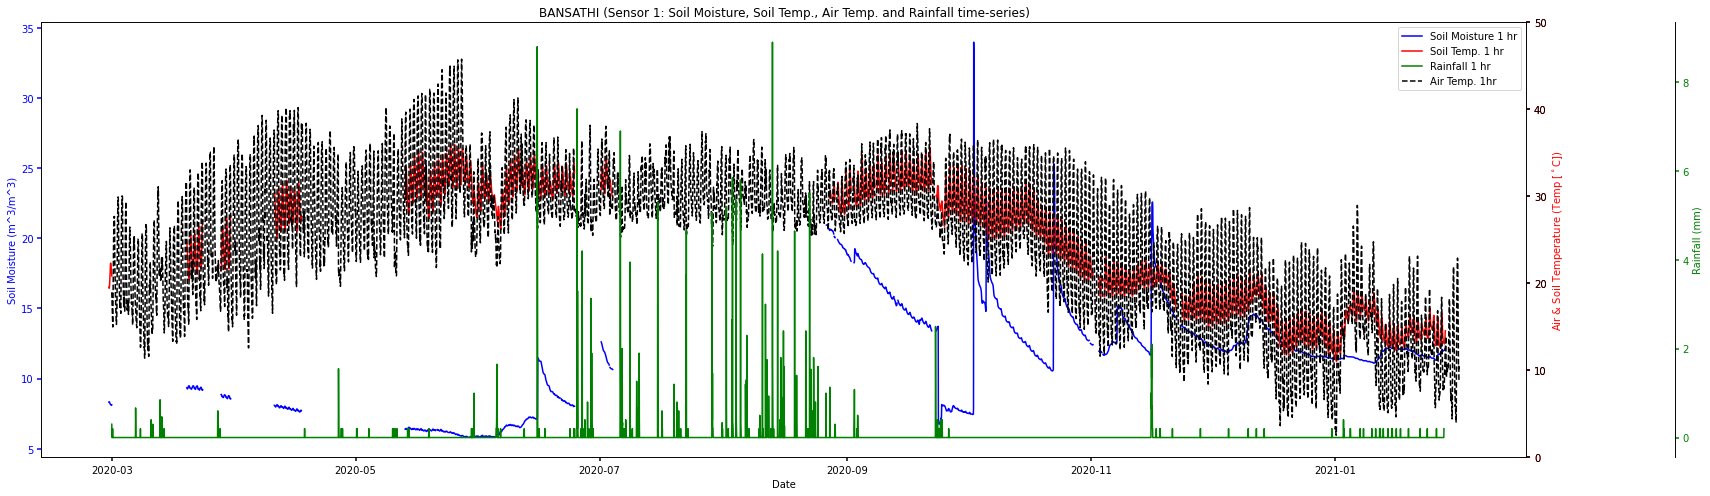

In [16]:
#sensor1
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S1SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S1Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 1: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

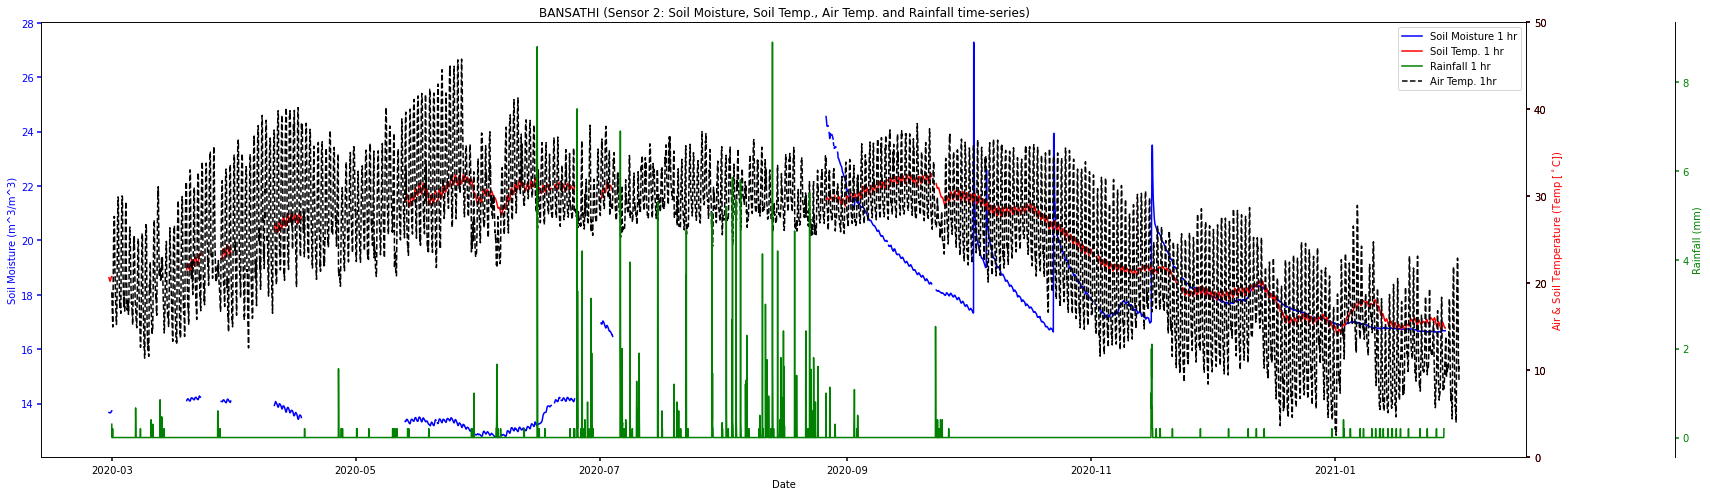

In [17]:
#sensor2
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S2SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S2Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 2: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

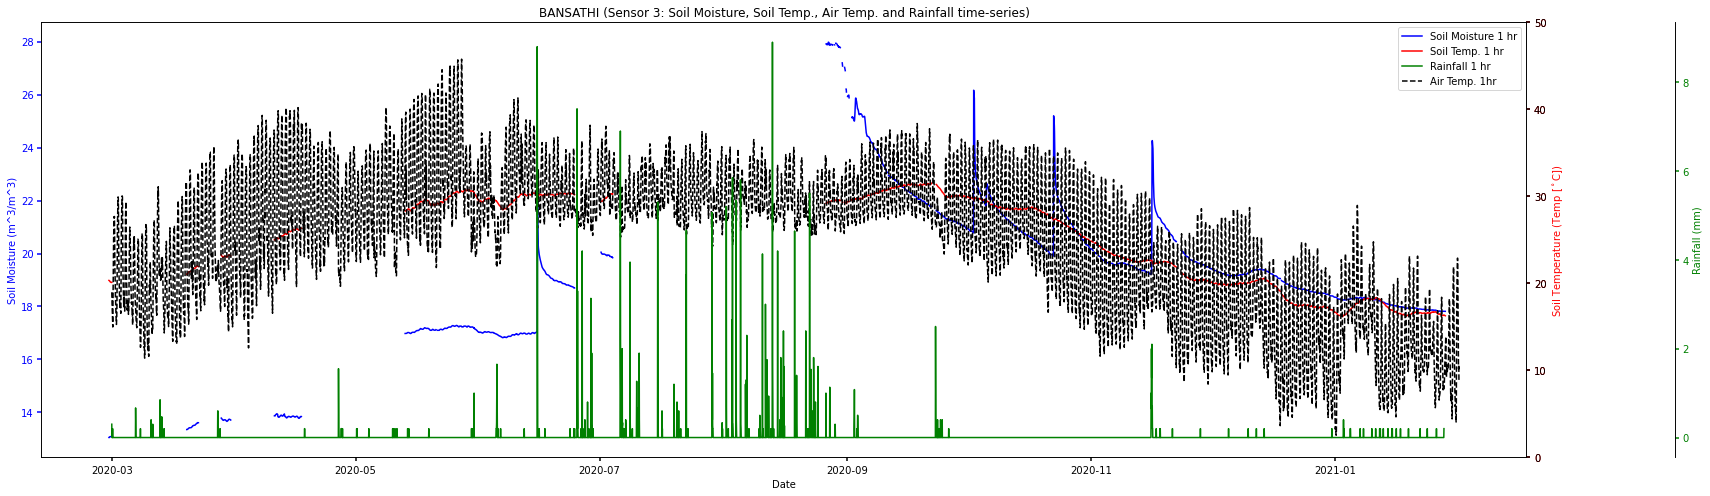

In [18]:
#sensor3
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S3SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S3Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 3: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

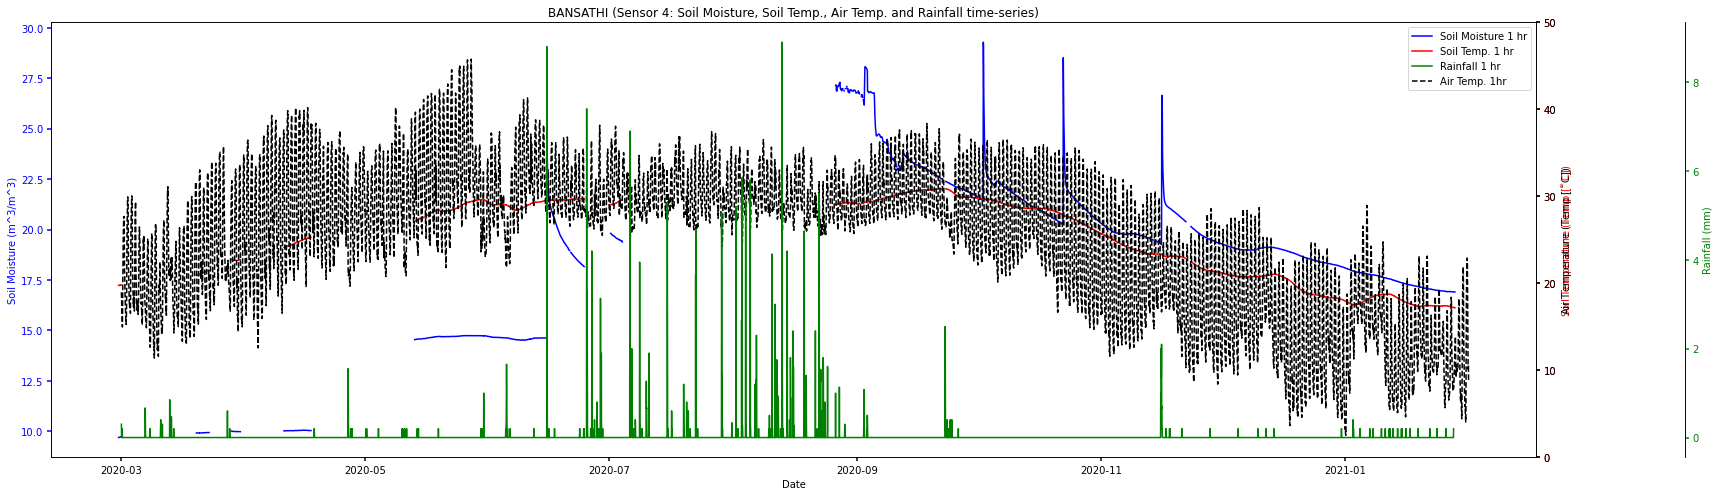

In [19]:
#sensor4
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S4SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S4Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 4: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

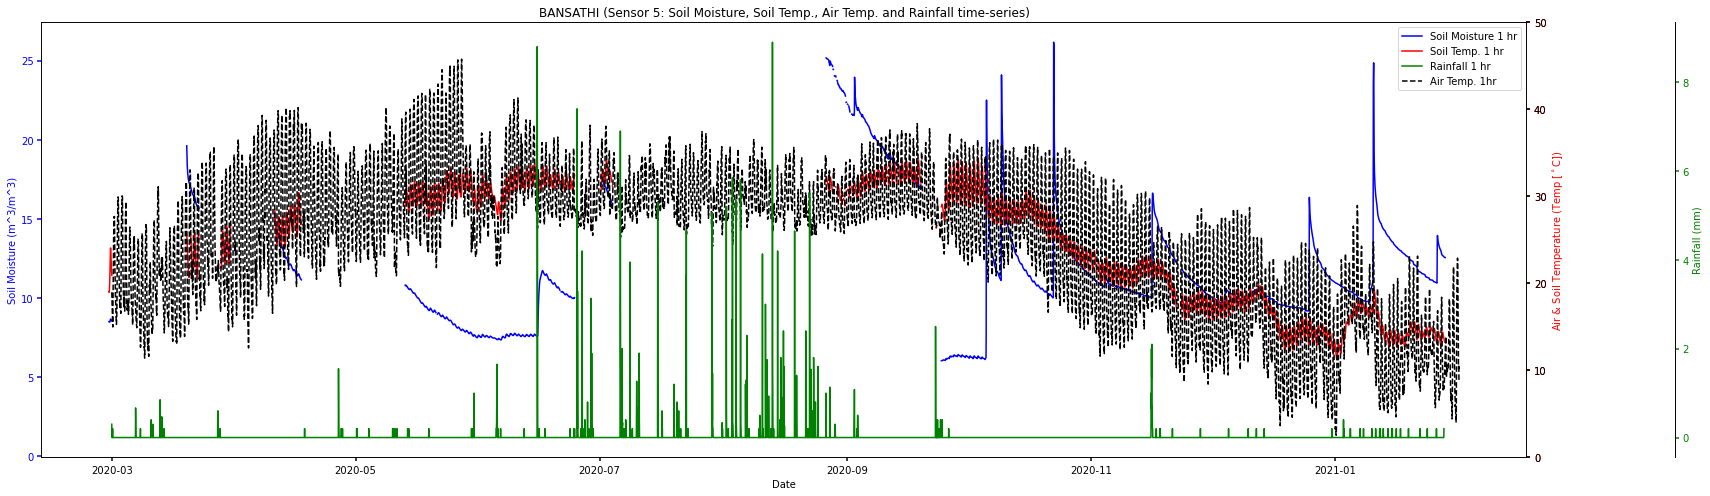

In [20]:
#sensor5
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S5SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S5Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 5: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

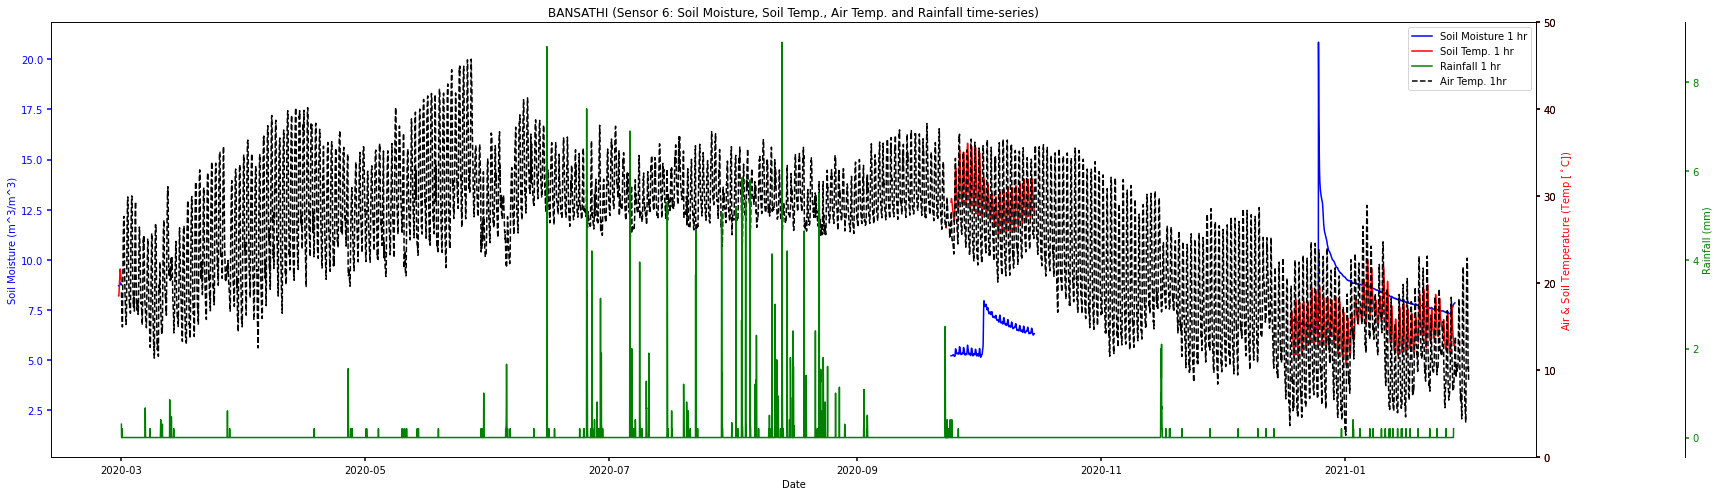

In [22]:
#sensor6
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S6SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S6Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 6: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

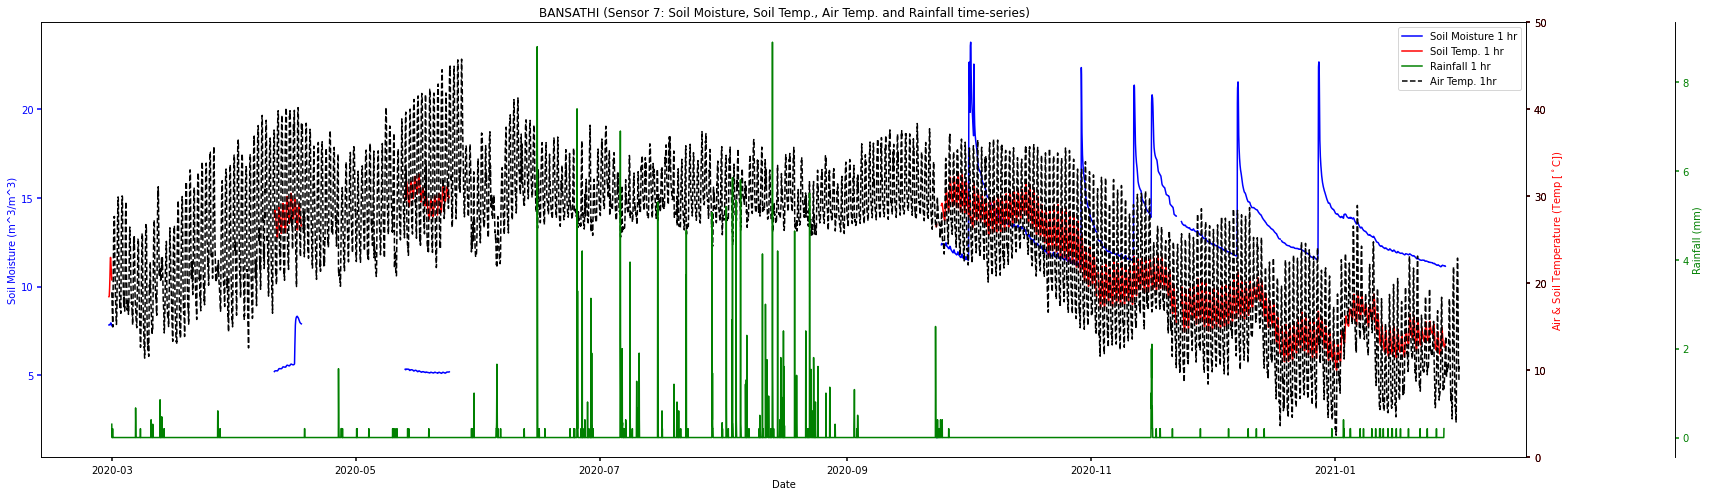

In [23]:
#sensor7
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S7SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S7Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 7: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

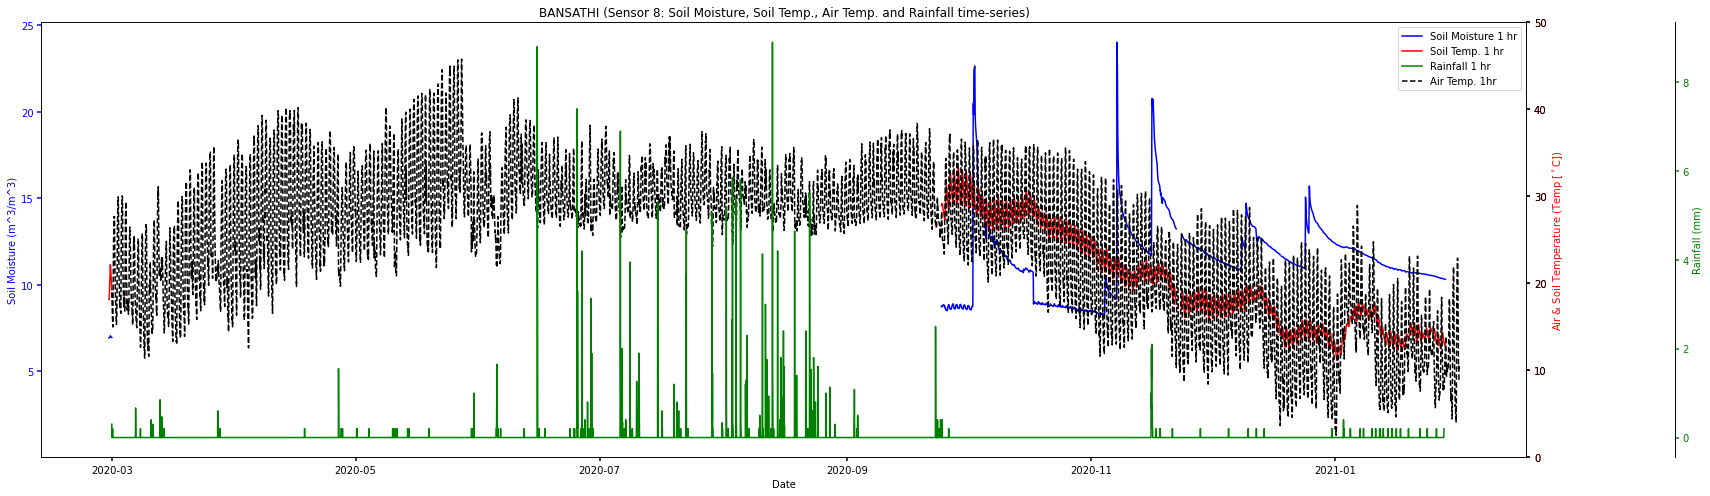

In [24]:
#sensor8
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S8SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S8Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 8: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

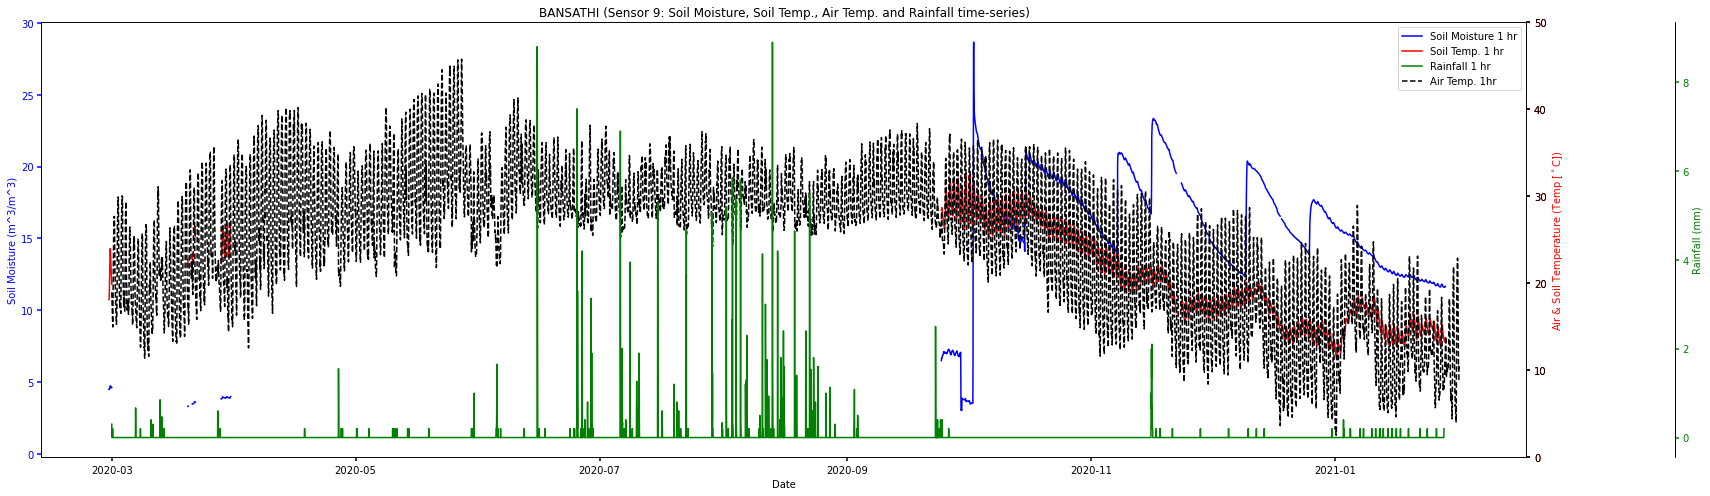

In [25]:
#sensor9
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S9SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S9Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 9: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

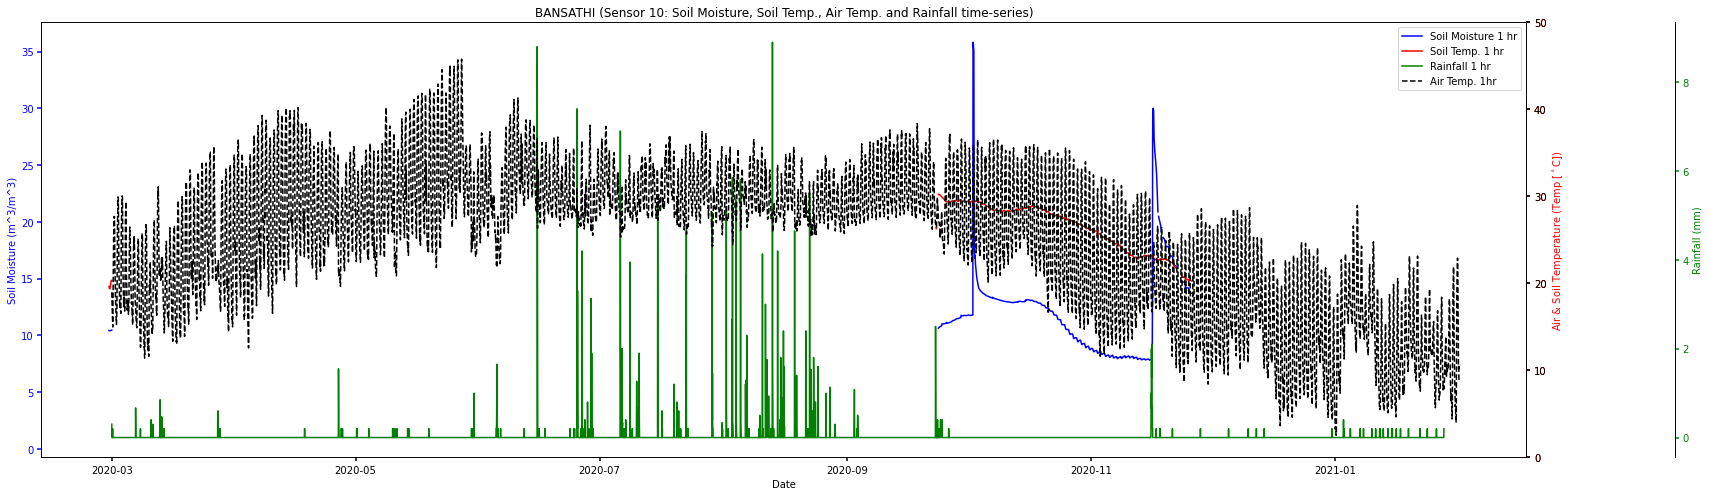

In [26]:
#sensor10
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S10SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S10Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par3.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 50)
par3.set_ylim(0, 50)
#par2.set_ylim(1, 65)

host.set_title("BANSATHI (Sensor 10: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()